# Polynomial chaos graphs

In this example we are going to create some graphs useful after the launch of a polynomial chaos algorithm. 
More precisely, we draw some members of the 1D polynomial family. 

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
def drawFamily(factory, degreeMax=5):
    # Load all the valid colors
    colorList = ot.Drawable.BuildDefaultPalette(degreeMax)

    # Create a fine title
    titleJacobi = factory.__class__.__name__.replace('Factory', '') + " polynomials"

    # Create an empty graph which will be fullfilled
    # with curves
    graphJacobi = ot.Graph(titleJacobi, "z", "polynomial values", True, "topright")

    # Fix the number of points for the graph
    pointNumber = 101

    # Bounds of the graph
    xMinJacobi = -1.0
    xMaxJacobi = 1.0

    # Get the curves
    for i in range(degreeMax):
        graphJacobi_temp = factory.build(i).draw(
            xMinJacobi, xMaxJacobi, pointNumber)
        graphJacobi_temp_draw = graphJacobi_temp.getDrawable(0)
        graphJacobi_temp_draw.setLegend("degree " + str(i))
        graphJacobi_temp_draw.setColor(colorList[i])
        graphJacobi.add(graphJacobi_temp_draw)
    return graphJacobi

Draw the 5-th first members of the Jacobi family.

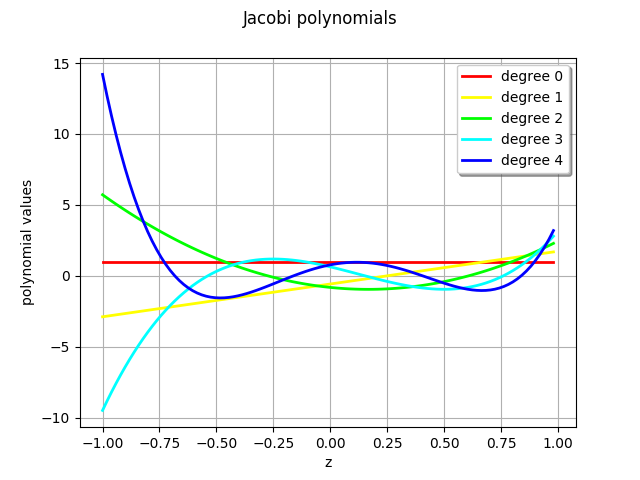

In [3]:
# Create the Jacobi polynomials family using the default Jacobi.ANALYSIS
# parameter set
alpha = 0.5
beta = 1.5
jacobiFamily = ot.JacobiFactory(alpha, beta)
drawFamily(jacobiFamily)

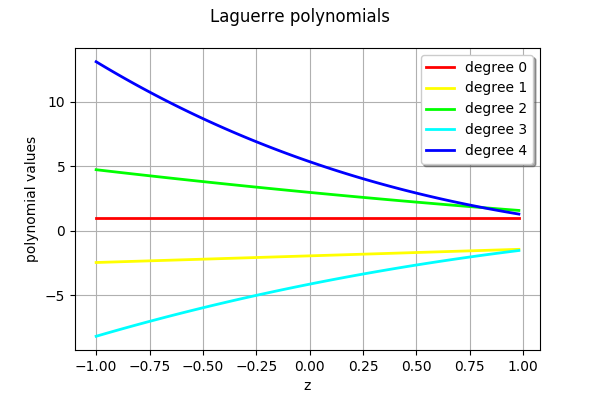

In [4]:
laguerreFamily = ot.LaguerreFactory(2.75, 1)
drawFamily(laguerreFamily)

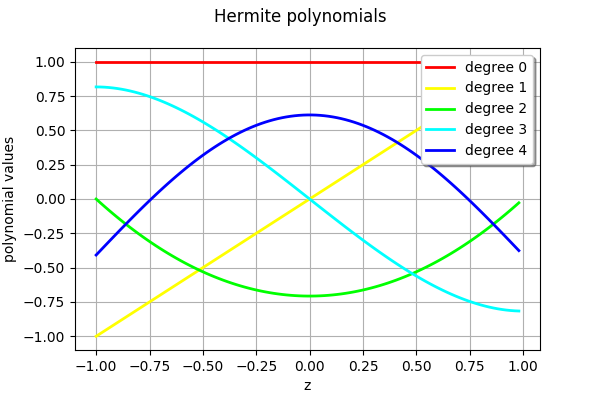

In [5]:
drawFamily(ot.HermiteFactory())